In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
from matplotlib import pyplot
import geopandas as gpd
import cartopy.io.shapereader as shpreader
import geodatasets
import xarray as xr
import numpy as np
from geopandas import GeoSeries
from pathlib import Path
from pyproj import Transformer
from shapely.geometry import Point , Polygon, MultiPolygon
from shapely.geometry.multipolygon import MultiPolygon
import shapely.wkt
import shapely.geometry
import shapely
from shapely.ops import nearest_points
from pathlib import Path
import rasterio
import rioxarray
import atlite

In [2]:
date_list =  [
    '2001',
    '2002',
    '2003',
    '2004',
    '2005',
    '2006',
    '2007',
    '2008',
    '2009',
    '2010',
    '2011',
    '2012',
    '2013',
    '2014',
    '2015',
    '2016',
    '2017',
    '2018',
    '2019',
    '2020',
    '2021',
]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
thailand = world.query('name == "Thailand"')


print(date_list[0])
cutout = atlite.Cutout(
    path="Data\\CDS_Data\\" + date_list[0] + ".nc",
    module= "era5",
    ## Scope it down within the boundary in TH ##
    bounds= thailand.iloc[0].geometry.bounds,
    dt = 'h',
    time= date_list[0],
    )
    ## there are several varibles that we can download, here, i download only 4 vars for a time consuming sake.
cutout.prepare(['height', 'wind', 'influx', 'temperature'])

    ## Calculate Capacity factor ##
cap_factors_pv = cutout.pv(    
    panel="CSi",
    orientation="latitude_optimal",
    capacity_factor=True,
    tracking= None
    )
cap_factors_wind = cutout.wind(turbine="Vestas_V112_3MW", capacity_factor=True)

ref_factors_pv = cap_factors_pv
ref_factors_wind = cap_factors_wind

## Loop through date list ##
for i in range(1,len(date_list),1):
     ## To Create cutout ##
    print(date_list[i])
    cutout = atlite.Cutout(
        path="Data\\CDS_Data\\" + date_list[i] + ".nc",
        module= "era5",
        ## Scope it down within the boundary in TH ##
        bounds= thailand.iloc[0].geometry.bounds,
        dt = 'h',
        time= date_list[i],
    )
    ## there are several varibles that we can download, here, i download only 4 vars for a time consuming sake.
    cutout.prepare(['height', 'wind', 'influx', 'temperature'])

    ## Calculate Capacity factor ##
    cap_factors_pv = cutout.pv(    
        panel="CSi",
        orientation="latitude_optimal",
        capacity_factor=True,
        tracking= None
        )
    cap_factors_wind = cutout.wind(turbine="Vestas_V112_3MW", capacity_factor=True)

    ref_factors_pv = ref_factors_pv + cap_factors_pv
    ref_factors_wind = ref_factors_wind + cap_factors_wind

ref_factors_pv = ref_factors_pv/len(date_list)
ref_factors_wind = ref_factors_wind/len(date_list)

ref_factors_wind = ref_factors_wind.to_dataset()
ref_factors_wind = ref_factors_wind.rename(name_dict={'capacity factor' : 'CF_Wind'})

ref_factors_pv = ref_factors_pv.to_dataset()
ref_factors_pv = ref_factors_pv.rename(name_dict={'capacity factor' : 'CF_Solar'})

xr_resourcepotential = ref_factors_pv
xr_resourcepotential['CF_Wind'] = ref_factors_wind['CF_Wind']

xr_resourcepotential = xr_resourcepotential.drop('y',dim=None)
xr_resourcepotential = xr_resourcepotential.drop('x',dim=None)
print(xr_resourcepotential)

C:\Users\basna\AppData\Local\Temp\ipykernel_21972\2784885297.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


2001
[########################################] | 100% Completed | 130.72 s
[########################################] | 100% Completed | 37.37 s
2002


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 122.34 s
[########################################] | 100% Completed | 79.50 s
2003


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 226.47 s
[########################################] | 100% Completed | 38.04 s
2004


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 116.24 s
[########################################] | 100% Completed | 47.59 s
2005


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 221.29 s
[########################################] | 100% Completed | 40.03 s
2006


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 115.39 s
[########################################] | 100% Completed | 37.50 s
2007


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 110.86 s
[########################################] | 100% Completed | 31.17 s
2008


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 97.23 s
[########################################] | 100% Completed | 31.58 s
2009


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 98.51 s
[########################################] | 100% Completed | 31.50 s
2010


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 98.67 s
[########################################] | 100% Completed | 31.38 s
2011


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 97.82 s
[########################################] | 100% Completed | 31.58 s
2012


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 97.83 s
[########################################] | 100% Completed | 31.88 s
2013


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 97.54 s
[########################################] | 100% Completed | 31.39 s
2014


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 103.51 s
[########################################] | 100% Completed | 35.30 s
2015


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 109.04 s
[########################################] | 100% Completed | 35.50 s
2016


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 110.48 s
[########################################] | 100% Completed | 35.69 s
2017


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 109.98 s
[########################################] | 100% Completed | 36.00 s
2018


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 109.87 s
[########################################] | 100% Completed | 35.40 s
2019


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 109.59 s
[########################################] | 100% Completed | 35.29 s
2020


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 110.99 s
[########################################] | 100% Completed | 35.30 s
2021


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\atlite\cutout.py:185: UserWarning: Arguments module, bounds, dt, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 109.56 s
[########################################] | 100% Completed | 35.29 s
<xarray.Dataset>
Dimensions:   (y: 59, x: 33)
Coordinates:
    lat       (y) float64 5.75 6.0 6.25 6.5 6.75 ... 19.25 19.5 19.75 20.0 20.25
    lon       (x) float64 97.5 97.75 98.0 98.25 98.5 ... 104.8 105.0 105.2 105.5
Dimensions without coordinates: y, x
Data variables:
    CF_Solar  (y, x) float64 0.1754 0.1756 0.1755 ... 0.1334 0.1299 0.1286
    CF_Wind   (y, x) float32 0.075 0.07562 0.07822 ... 0.004219 0.008607 0.02549


In [3]:
xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')
df_landuse_suitability_index = xr_landuse_suitability_index.to_dataframe()
df_landuse_suitability_index.reset_index(inplace=True)
df_landuse_suitability_index = gpd.GeoDataFrame(df_landuse_suitability_index, geometry =gpd.points_from_xy(df_landuse_suitability_index['lon'],df_landuse_suitability_index['lat']))
df_landuse_suitability_index.crs = {'init': 'epsg:4326'}

df_resourcepotential = xr_resourcepotential.to_dataframe()
df_resourcepotential.reset_index(inplace=True)
df_resourcepotential = gpd.GeoDataFrame(df_resourcepotential, geometry =gpd.points_from_xy(df_resourcepotential['lon'],df_resourcepotential['lat']))
df_resourcepotential.crs = {'init': 'epsg:4326'}

df_resourcepotential_2 = gpd.sjoin_nearest(df_landuse_suitability_index,df_resourcepotential,how='left')

for i in df_resourcepotential_2.columns:
    if i not in (['lon_left','lat_left','lon','lat','CF_Wind','CF_Solar','geometry']):
        df_resourcepotential_2 = df_resourcepotential_2.drop(columns=i)

try: 
    df_resourcepotential_2 = df_resourcepotential_2.rename(columns= {'lon_left' : 'lon'})
    df_resourcepotential_2 = df_resourcepotential_2.rename(columns= {'lat_left' : 'lat'})
except:
    None

## Acquire polygon containing boudary of Thailand
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
th = world.loc[world['name'] == 'Thailand'] # get Thailand row
boundaries = th['geometry'] # get Thailand geometry
boundaries.crs = {'init': 'epsg:4326'}
boundaries = boundaries.geometry.unary_union

df_resourcepotential_2['CF_Wind'].loc[~df_resourcepotential_2.within(boundaries)] = 0
df_resourcepotential_2['CF_Solar'].loc[~df_resourcepotential_2.within(boundaries)] = 0

min_wind = df_resourcepotential_2['CF_Wind'].loc[df_resourcepotential_2['CF_Wind'] > 0].min()
max_wind = df_resourcepotential_2['CF_Wind'].loc[df_resourcepotential_2['CF_Wind'] > 0].max()

min_solar = df_resourcepotential_2['CF_Solar'].loc[df_resourcepotential_2['CF_Solar'] > 0 ].min()
max_solar = df_resourcepotential_2['CF_Solar'].loc[df_resourcepotential_2['CF_Solar'] > 0].max()

df_resourcepotential_2['CF_Wind'] = 3* (df_resourcepotential_2['CF_Wind']-min_wind)/(max_wind-min_wind)
df_resourcepotential_2['CF_Solar'] = 3* (df_resourcepotential_2['CF_Solar']-min_solar)/(max_solar-min_solar)

df_resourcepotential_2 = df_resourcepotential_2.rename(columns={'CF_Wind' : 'SI_Wind'})
df_resourcepotential_2 = df_resourcepotential_2.rename(columns={'CF_Solar' : 'SI_Solar'})


df_resourcepotential_2.reset_index(inplace=True,drop=True)

xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')
df_landuse_suitability_index= xr_landuse_suitability_index.to_dataframe()
df_landuse_suitability_index.reset_index(inplace=True)
df_landuse_suitability_index = gpd.GeoDataFrame(df_landuse_suitability_index, geometry =gpd.points_from_xy(df_landuse_suitability_index['lon'],df_landuse_suitability_index['lat']))

df_resourcepotential_2['SI_Wind'].loc[df_landuse_suitability_index['SI_Wind'] ==  0] = 0
df_resourcepotential_2['SI_Solar'].loc[df_landuse_suitability_index['SI_Solar'] ==  0] = 0
df_resourcepotential_2.reset_index(inplace=True)

try: 
    df_resourcepotential_2 = df_resourcepotential_2.drop(columns=['geometry'])
except:
    None

print(df_resourcepotential_2.columns)
df_resourcepotential_2 = df_resourcepotential_2.groupby(['lat', 'lon']).agg('mean')
df_resourcepotential_2.reset_index(inplace=True)
df_resourcepotential_2 = df_resourcepotential_2.set_index(['lat', 'lon'])
print(df_resourcepotential_2)

xr_resourcepotential_2 = xr.Dataset.from_dataframe(df_resourcepotential_2)
print(xr_resourcepotential_2)
xr_resourcepotential_2.to_netcdf(path='Output\\xr_SI_resourcepotential.nc')

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect.

Index(['index', 'lat', 'lon', 'SI_Solar', 'SI_Wind'], dtype='object')
                           index  SI_Solar  SI_Wind
lat       lon                                      
5.615278  97.345833          0.0       0.0      0.0
          97.348611          1.0       0.0      0.0
          97.351389          2.0       0.0      0.0
          97.354167          3.0       0.0      0.0
          97.356944          4.0       0.0      0.0
...                          ...       ...      ...
20.462500 105.623611  15957805.0       0.0      0.0
          105.626389  15957806.0       0.0      0.0
          105.629167  15957807.0       0.0      0.0
          105.631944  15957808.0       0.0      0.0
          105.634722  15957809.0       0.0      0.0

[15957810 rows x 3 columns]
<xarray.Dataset>
Dimensions:   (lat: 5346, lon: 2985)
Coordinates:
  * lat       (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon       (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.

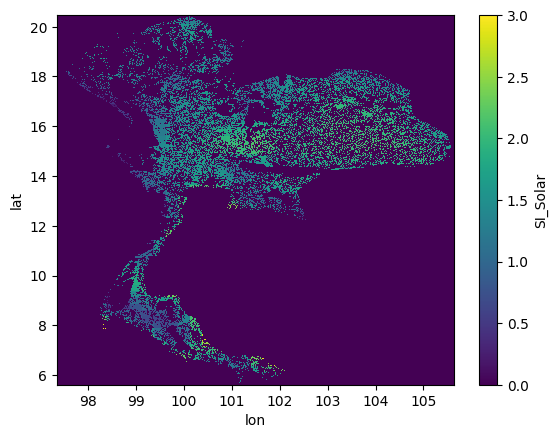

In [4]:
xr_resourcepotential_2['SI_Solar'].plot()

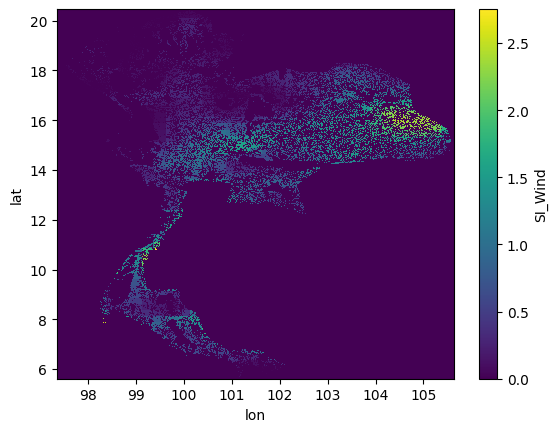

In [5]:
xr_resourcepotential_2['SI_Wind'].plot()